In [ ]:
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPool2D, UpSampling2D, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
from keras.models import Model
from imgaug import augmenters
from random import randint
import pandas as pd
import numpy as np
import keras

In [ ]:
### read dataset
train = pd.read_csv("/content/fashion-mnist_train.csv")
## recreate the train_x array and val_x array
train_x = train.iloc[:, 1:].values
train_y = train.iloc[:, 0].values
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)
## normalize and reshape
train_x = train_x/255.
val_x = val_x/255.


In [ ]:
train_x = train_x.reshape(-1, 28, 28, 1)
val_x = val_x.reshape(-1, 28, 28, 1)


In [ ]:
# input layer
input_layer = Input(shape=(28, 28, 1))
# encoding architecture

encoded_layer2 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer)
encoded_layer2 = MaxPool2D( (2, 2), padding='same')(encoded_layer2)
encoded_layer3 = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer2)
latent_view = MaxPool2D( (2, 2), padding='same')(encoded_layer3)

# decoding architecture
decoded_layer1 = Conv2D(32, (3, 3), activation='relu', padding='same')(latent_view)
decoded_layer1 = UpSampling2D((2, 2))(decoded_layer1)
decoded_layer2 = Conv2D(16, (3, 3), activation='relu', padding='same')(decoded_layer1)
decoded_layer2 = UpSampling2D((2, 2))(decoded_layer2)

output_layer = Conv2D(1, (3, 3), padding='same')(decoded_layer2)
# compile the model
model_2 = Model(input_layer, output_layer)

In [ ]:
  from keras.optimizers import Adam
  optimizer = Adam(learning_rate=0.001)

In [ ]:
model_2.compile(optimizer=optimizer, loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, mode='auto')
history = model_2.fit(train_x, train_x, epochs=20, batch_size=128, validation_data=(val_x, val_x), callbacks=[early_stopping])


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0402 - val_loss: 0.0111
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0102 - val_loss: 0.0081
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0078 - val_loss: 0.0069
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0062 - val_loss: 0.0059
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0055 - val_loss: 0.0053
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0053 - val_loss: 0.0053
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0052 - val_loss: 0.0050
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step

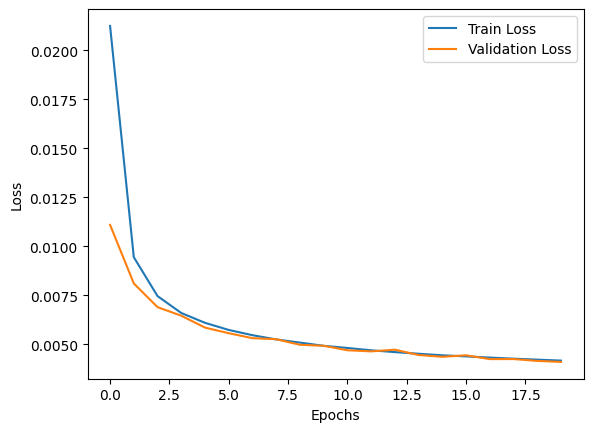

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


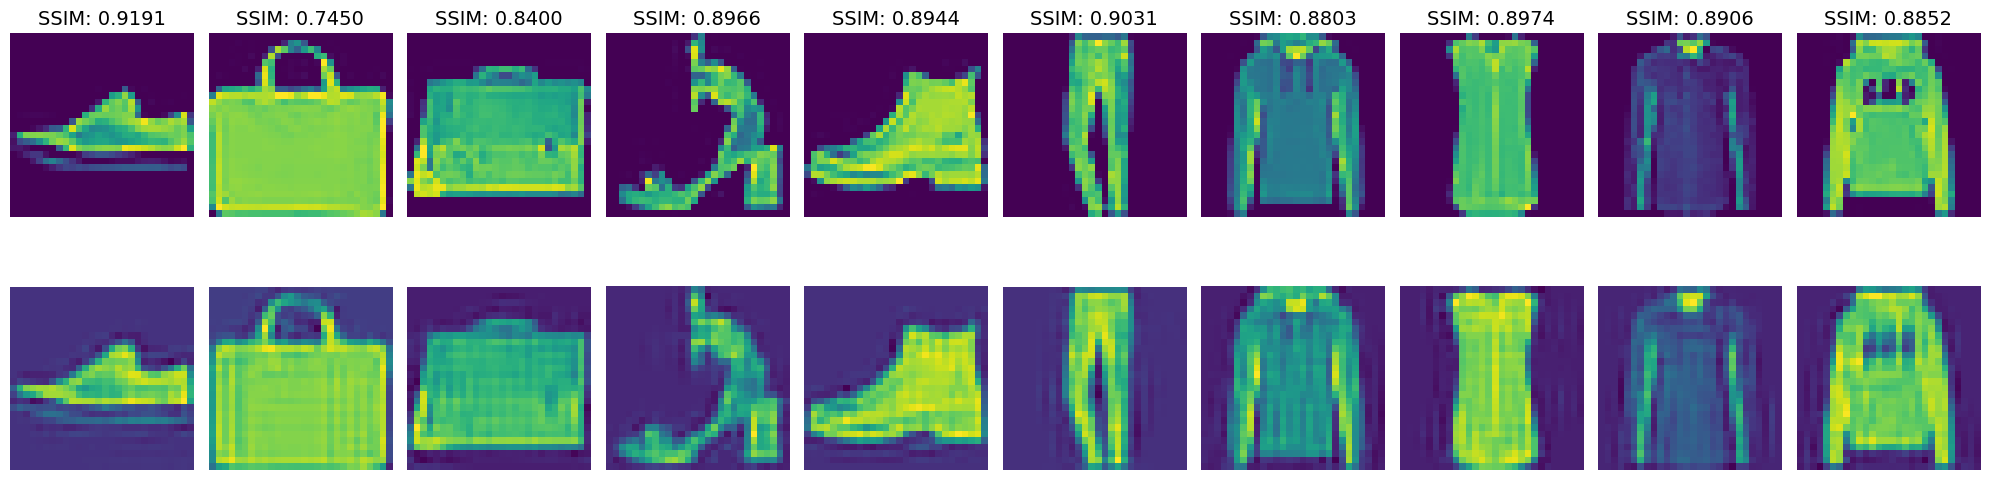

In [ ]:
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

preds = model_2.predict(val_x)
f, ax = plt.subplots(2, 10, figsize=(20, 6))

for i in range(10):
  ssim_index, _ = ssim(val_x[i].reshape(28, 28), preds[i].reshape(28, 28), data_range=1.0, full=True)
  ax[0, i].set_title(f'SSIM: {ssim_index:.4f}', fontsize=14)
  ax[0, i].imshow(val_x[i].reshape(28, 28))
  ax[0, i].axis('off')

  ax[1, i].imshow(preds[i].reshape(28, 28))
  ax[1, i].axis('off')

  # ax[2, i].imshow(val_x[i].reshape(28, 28))
  # ax[2, i].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
model_2.save_weights('autoencoder.weights.h5')

In [ ]:
train_Y_one_hot = to_categorical(train_y)
val_Y_one_hot = to_categorical(val_y)
print(train_Y_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_Y_one_hot, test_size=0.2, random_state=42)

In [ ]:
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((38400, 28, 28, 1), (9600, 28, 28, 1), (38400, 10), (9600, 10))

In [ ]:
def encoder(input_img):
  encoded_layer = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
  encoded_layer = MaxPool2D( (2, 2), padding='same')(encoded_layer)
  encoded_layer = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_layer)
  encoded_layer = MaxPool2D( (2, 2), padding='same')(encoded_layer)
  return encoded_layer

In [ ]:
def fc(encode):
    flat = Flatten()(encode)
    d = Dense(128, activation='relu')(flat)
    d = Dropout(0.25)(d)
    output_layer = Dense(10, activation='softmax')(d)
    return output_layer

In [ ]:
input_img = Input(shape=(28, 28, 1))
encode = encoder(input_img)
full_model = Model(input_img, fc(encode))

In [ ]:
for l1,l2 in zip(full_model.layers[:5],model_2.layers[0:5]):
    l1.set_weights(l2.get_weights())

In [ ]:
model_2.get_weights()[0][1]

array([[[ 0.17448077,  0.04572633, -0.02530187,  0.04448484,
         -0.12267917,  0.07497029,  0.13537154,  0.1896464 ,
          0.01767301,  0.09959354,  0.17491569, -0.03752096,
          0.02814243, -0.15310448, -0.14924814, -0.10868779]],

       [[ 0.13172808,  0.13688743, -0.09699178, -0.0832119 ,
         -0.1507423 ,  0.12441617, -0.16974863, -0.00548981,
         -0.21513031,  0.27148363,  0.09000351,  0.01158801,
          0.15562627, -0.10748522,  0.1913397 ,  0.18719606]],

       [[ 0.03057259,  0.1869896 ,  0.15682277, -0.17526707,
         -0.22706702, -0.10798111,  0.03919022, -0.172485  ,
         -0.0490995 ,  0.16078904,  0.00813716,  0.07772826,
         -0.10474318, -0.06211484, -0.10922921,  0.17983514]]],
      dtype=float32)

In [ ]:
full_model.get_weights()[0][1]


array([[[ 0.17448077,  0.04572633, -0.02530187,  0.04448484,
         -0.12267917,  0.07497029,  0.13537154,  0.1896464 ,
          0.01767301,  0.09959354,  0.17491569, -0.03752096,
          0.02814243, -0.15310448, -0.14924814, -0.10868779]],

       [[ 0.13172808,  0.13688743, -0.09699178, -0.0832119 ,
         -0.1507423 ,  0.12441617, -0.16974863, -0.00548981,
         -0.21513031,  0.27148363,  0.09000351,  0.01158801,
          0.15562627, -0.10748522,  0.1913397 ,  0.18719606]],

       [[ 0.03057259,  0.1869896 ,  0.15682277, -0.17526707,
         -0.22706702, -0.10798111,  0.03919022, -0.172485  ,
         -0.0490995 ,  0.16078904,  0.00813716,  0.07772826,
         -0.10474318, -0.06211484, -0.10922921,  0.17983514]]],
      dtype=float32)

In [ ]:
for layer in full_model.layers[:5]:
    layer.trainable = False
for layer in full_model.layers[5:]:
    layer.trainable = True

In [ ]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

In [ ]:
full_model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [ ]:
full_model.summary()


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         200,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,922 (808.29 KB)

 Trainable params: 202,122 (789.54 KB)

 Non-trainable params: 4,800 (18.75 KB)

In [ ]:
hist = full_model.fit(train_x, train_y, batch_size=256,epochs=20,validation_data=(val_x, val_y))

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6372 - loss: 1.0570 - val_accuracy: 0.8290 - val_loss: 0.4977
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8219 - loss: 0.4981 - val_accuracy: 0.8483 - val_loss: 0.4230
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8446 - loss: 0.4387 - val_accuracy: 0.8599 - val_loss: 0.3897
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8563 - loss: 0.4029 - val_accuracy: 0.8724 - val_loss: 0.3616
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8682 - loss: 0.3744 - val_accuracy: 0.8735 - val_loss: 0.3520
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8721 - loss: 0.3599 - val_accuracy: 0.8789 - val_loss: 0.3336
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8737 - loss: 0.3490 - val_accuracy: 0.8833 - val_loss: 0.3242
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8821 - loss: 0.3317 - val_accuracy: 0

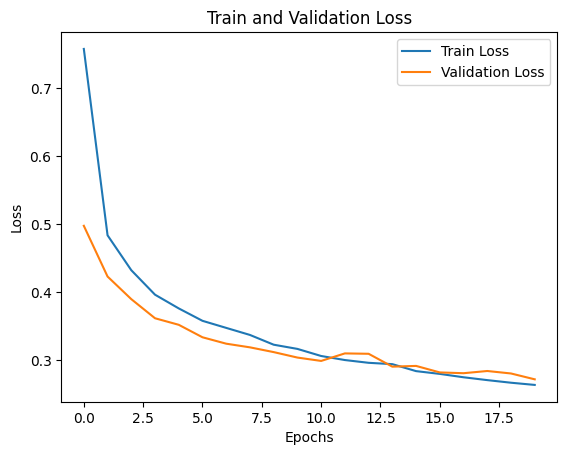

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Train and Validation Loss')
plt.show()


300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


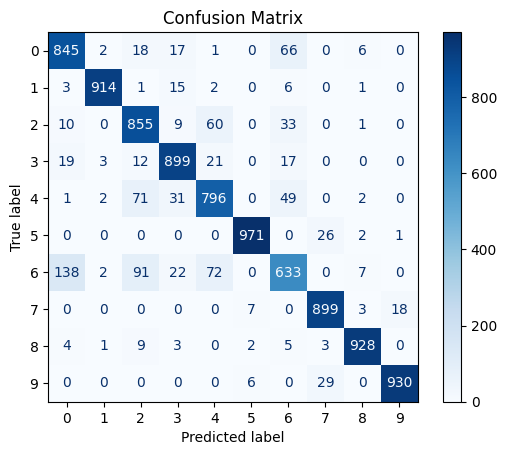

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Отримання передбачень для валідаційного набору
val_predictions = full_model.predict(val_x)
val_predictions_classes = np.argmax(val_predictions, axis=1)
val_true_classes = np.argmax(val_y, axis=1)

# Побудова матриці плутанини
conf_matrix = confusion_matrix(val_true_classes, val_predictions_classes)
ConfusionMatrixDisplay(conf_matrix).plot(cmap='Blues')

plt.title("Confusion Matrix")
plt.show()
